# Домашнее задание 5

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_5

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} f(x) = \frac{1}{2}x^T A x - b^T x,
\end{equation}
где в качестве матрицы $A$ - случайная матрица с $L =1000$, $\mu = 1$, $d = 100$, $b$ - так же случайный вектор.

__(а)__ Для такой задачи симулируем итерацию SGD:
$$
x^{k+1} = x^k - \gamma (\nabla f(x^k) + \xi^k),
$$
где $\xi^k$ - независимая от $x^k$ случайная величина из нормального распределения $\mathcal{N}(0, 100)$.

Для такого метода с $\gamma = \frac{1}{L}$ постройте график сходимости (критерий $\| \nabla f(x^k)\|^2$). Постройте на этом же графике сходимость честного градиентного спуска c $\gamma = \frac{1}{L}$. Сделайте вывод о характере сходимости нового метода.

In [1]:
import numpy as np
from numpy import linalg
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import math
import pandas as pd
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

In [2]:
d = 100
mu = 1
L = 1000

def positive_determined_matrix(d, mu, L): #генерация положительно-определенной матрицы, так чтобы A-mu*I >= 0
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu, L,d)
        diagonal_entries[0] = mu
        diagonal_entries[1] = L
        D = np.diag(diagonal_entries)
        m = ortho_group.rvs(d)
        A = m.dot(D).dot(np.linalg.inv(m))
        if (np.all(np.linalg.eigvals(A-mu*np.eye(d)) >= 0)):
            i += 1
        print(np.all(np.linalg.eigvals(A-mu*np.eye(d)) >= 0))
    return A

A = positive_determined_matrix(d, mu, L)
print("Проверка на положительную определенность A:", np.all(np.linalg.eigvals(A) >= 0))
print("Проверка на положительную определенность A - mu*E:", np.all(np.linalg.eigvals(A - mu*np.eye(d)) >= 0))

True
Проверка на положительную определенность A: True
Проверка на положительную определенность A - mu*E: True


In [3]:
b = np.random.uniform(0, 2, d)
def gradient(x, A, b):
    return A.dot(x) - b

In [4]:
def stohastic_gradient_descent(A, b, start, learning_rate, amount_of_iterations):
    x = start
    x = x.reshape(1, d)
    timeprog = []
    grad_array= []
    begin_time = time.time()
    for i in range (1, amount_of_iterations):
        ksi = np.random.normal(0, 10, d)
        grad = gradient(x[i-1], A, b)
        grad_array.append(grad)
        x = np.vstack([x, x[i-1] - learning_rate*(grad + ksi)])
        timeprog.append(time.time() - begin_time)
    return x, grad_array, timeprog

In [5]:
res1, grad1, time1 = stohastic_gradient_descent(A, b, np.ones(d), 1/L, 10000)

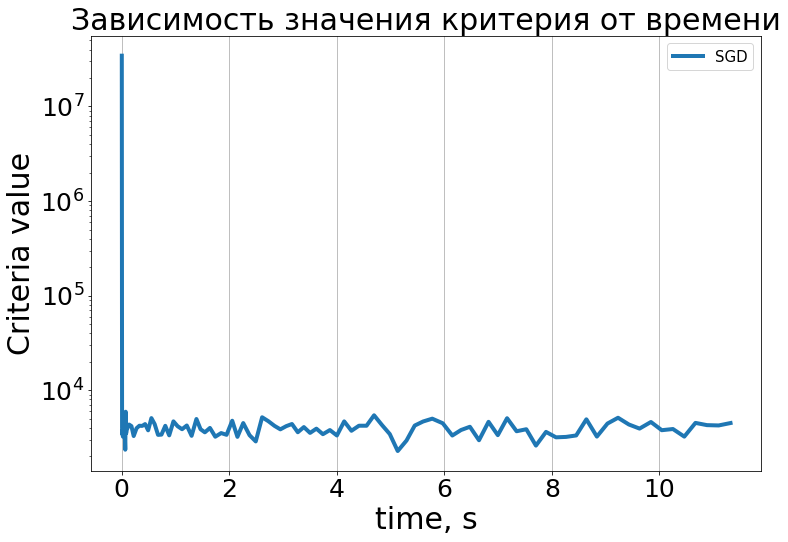

In [6]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, time1[100*i])
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad1[100*i].dot(grad1[100*i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X, Y, linewidth=4, label = 'SGD')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.grid(axis = 'x')

In [7]:
def gradient_descent(A, b, start, learning_rate, amount_of_iterations):
    x = start
    x = x.reshape(1, d)
    timeprog = []
    grad_array= []
    begin_time = time.time()
    for i in range (1, amount_of_iterations):
        grad = gradient(x[i-1], A, b)
        grad_array.append(grad)
        x = np.vstack([x, x[i-1] - learning_rate*grad])
        timeprog.append(time.time() - begin_time)
    return x, grad_array, timeprog

In [8]:
res2, grad2, time2 = gradient_descent(A, b, np.ones(d), 1/L, 10000)

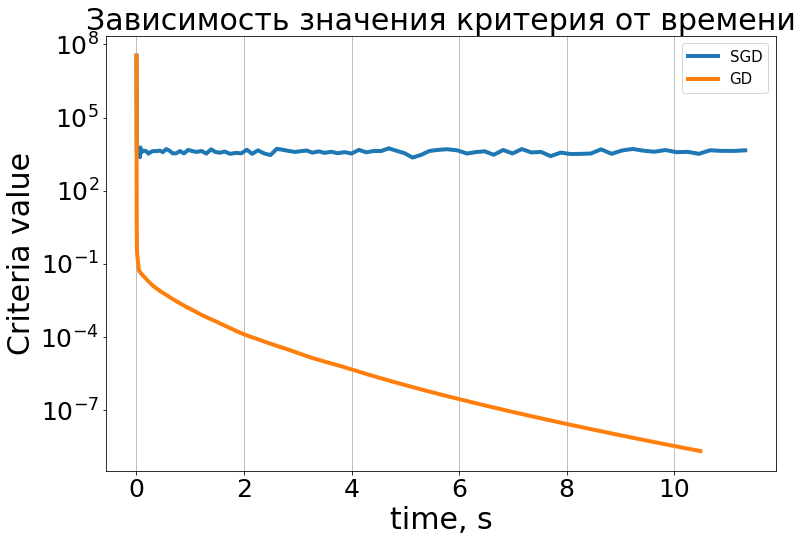

In [9]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time1[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad1[100*i].dot(grad1[100*i]))
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, time2[100*i])
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, grad2[100*i].dot(grad2[100*i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'SGD')
plt.semilogy(X2, Y2, linewidth=4, label = 'GD')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.grid(axis = 'x')

Симулирование SGD показало плохой результат, градиент постоянно сбивался и в итоге метод не сошелся

__(б)__ На семинаре обсуждались способы борьбы со "стохастичностью" сходимости градиентного спуска. В частности, мы затронули использование уменьшающегося шага (смотри, например, Теорему 5 из [работы](https://arxiv.org/pdf/1907.04232.pdf)), а также использование батчирования (в нашем случае это просто замена: $\xi^k \to \frac{1}{b} \sum\limits_{i=1}^b \xi^k_i$, где $\xi^k_i \in \mathcal{N}(0, 100)$ и независимы). Реализуйте эти модификации (для батчирования возьмите $b = 10 , 100$). Добавьте полученные результаты на график сходимости из пункта (а). Постройте также график сходимости, где по оси $x$ будет не количество итераций, а количество генераций $\xi^k_i$ (количество вызовов стохастического градиента).

In [10]:
def modified_stohastic_gradient_descent(A, b, start, learning_rate, amount_of_iterations, batch):
    x = start
    x = x.reshape(1, d)
    timeprog = []
    grad_array= []
    begin_time = time.time()
    for i in range (1, amount_of_iterations):
        if learning_rate == 1:
            lr = 57/(L*i)
            ksi = np.random.normal(0, 10, d)
        if learning_rate == 2:
            ksi1 = np.random.normal(0, 10, d)
            ksi = 1/batch*sum(ksi1[i] for i in range(0, batch))*np.ones(d)
            lr = 1/L
        grad = gradient(x[i-1], A, b)
        grad_array.append(grad)
        x = np.vstack([x, x[i-1] - lr*(grad + ksi)])
        timeprog.append(time.time() - begin_time)
    return x, grad_array, timeprog

In [11]:
res3, grad3, time3 = modified_stohastic_gradient_descent(A, b, np.ones(d), 1, 10000, 10)

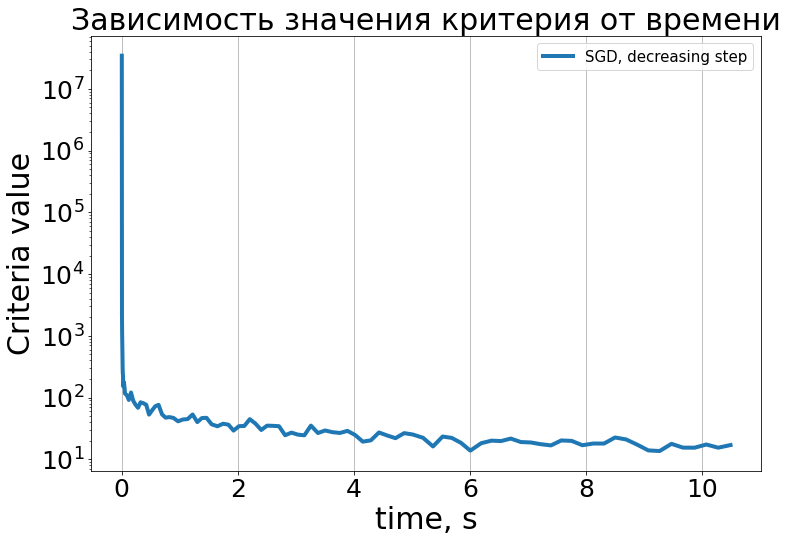

In [12]:
X = np.array([])
for i in range (0, 99):
    X = np.append(X, time3[100*i])
Y = np.array([])
for i in range (0, 99):
    Y = np.append(Y, grad3[100*i].dot(grad3[100*i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X, Y, linewidth=4, label = 'SGD, decreasing step')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.grid(axis = 'x')

In [13]:
res41, grad41, time41 = modified_stohastic_gradient_descent(A, b, np.ones(d), 2, 10000, 10)
res42, grad42, time42 = modified_stohastic_gradient_descent(A, b, np.ones(d), 2, 10000, 100)

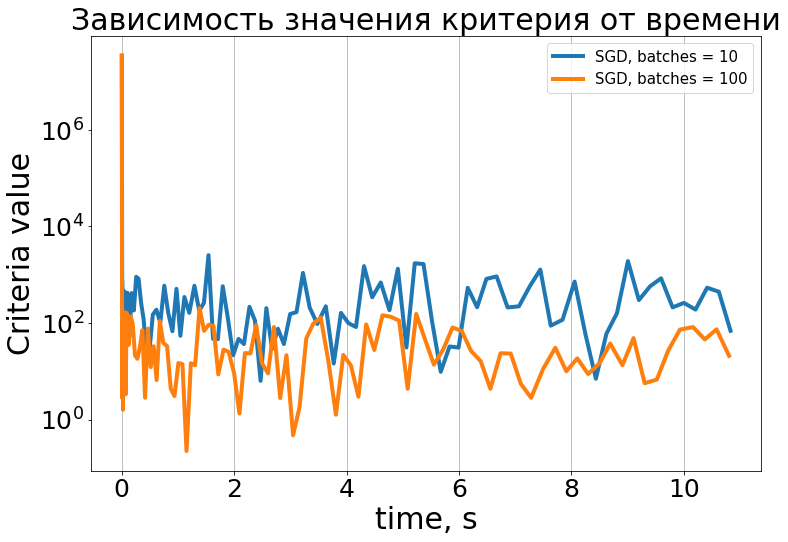

In [14]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time41[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad41[100*i].dot(grad41[100*i]))
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, time42[100*i])
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, grad42[100*i].dot(grad42[100*i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'SGD, batches = 10')
plt.semilogy(X2, Y2, linewidth=4, label = 'SGD, batches = 100')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.grid(axis = 'x')

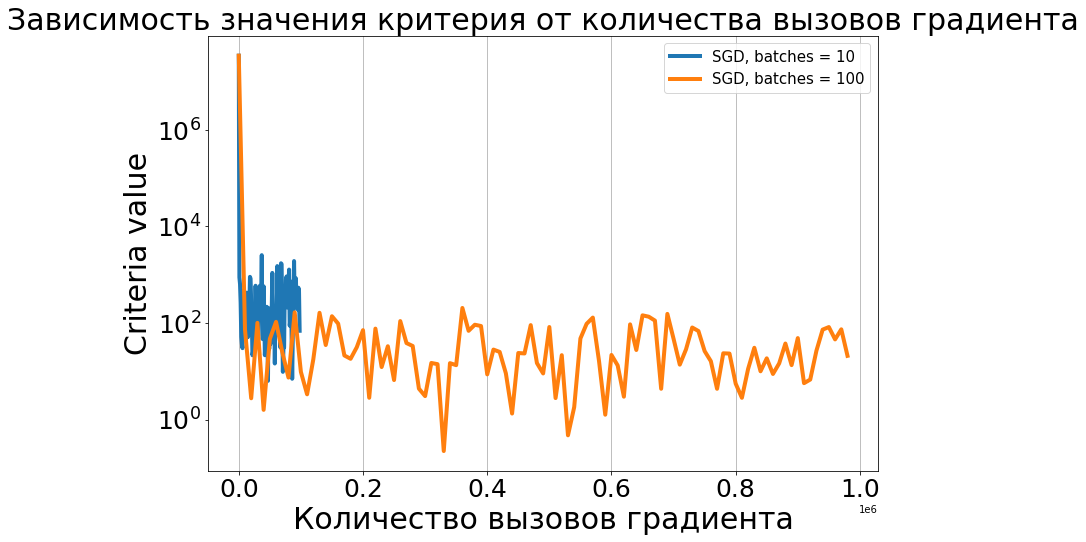

In [15]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, 1000*i)
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, grad41[100*i].dot(grad41[100*i]))
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, 10000*i)
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, grad42[100*i].dot(grad42[100*i]))
    
plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'SGD, batches = 10')
plt.semilogy(X2, Y2, linewidth=4, label = 'SGD, batches = 100')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel("Количество вызовов градиента", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от количества вызовов градиента", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


plt.grid(axis = 'x')

## Задача 2

Рассмотрим задачу логистической регрессии на датасете mushrooms с $\ell_2$-регуляризацией (коэффициент регуляризации равен $\frac{L}{1000}$). Как мы знаем, эта задача имеет вид конечной суммы:
\begin{equation}
\min_{w \in \mathbb{R}^d} f(w) := \frac{1}{n} \sum\limits_{j=1}^n f_j(w) := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b f_{ji}(w)\right] := \frac{1}{n} \sum\limits_{j=1}^n \left[\frac{1}{b} \sum\limits_{i=1}^b l (g(w, x_i), y_i)\right],
\end{equation}
где $nb = N$ - полный размер выборки. Решите данную задачу с помощью SGD, SAGA (секция А.5 из [работы](https://arxiv.org/pdf/1905.11261.pdf)), SVRG (секция А.9 из [работы](https://arxiv.org/pdf/1905.11261.pdf)) и SARAH ([работа](https://arxiv.org/pdf/1703.00102.pdf)). 

__(а)__ Оцените $\mu$ и $L$ для данной задачи. Обратите внимание, что теория для SAGA, SVRG, SARAH предполагает, что $L$ - это константа Липшица градиентов $\nabla f_j$. 

Возьмём размер батча, равным 50, а затем подсчитаем $L$ и $\mu$ как наибольшее и наименьшее собственное значение Гессиана $f_j = \frac{1}{b} ||X_{batch_j}\omega - y||^2 + \lambda ||\omega||^2$

In [16]:
dataset = "mushrooms.txt"

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
N, d = X.shape

y = 2*y - 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
N_train, d_train = X_train.shape
N_test, d_test = X_test.shape

batch = 50
n = N_train//batch

In [17]:
index = np.random.randint(0, N_train, batch)
X_batch = X_train[index]
Y_batch = y_train[index]

In [18]:
L = 1/batch * 2 * max(np.linalg.eigvalsh((X_batch.T.dot(X_batch) + 2 * 1/50 * np.eye(d))))
print("L = ", L)
mu = 1/batch * 2  * min(np.linalg.eigvalsh((X_batch.T.dot(X_batch) + 2 * 1/50 * np.eye(d))))
print("mu = ", mu)

L =  20.809966107770432
mu =  0.001599999999998752


$mu\approx 0\Rightarrow задача выпуклая$

__(б)__ Реализуйте SGD, SAGA, SVRG, SARAH для задачи логистической регресии из $n$ слагаемых, где каждое слагаемое так же имеет виды суммы размеры $b$. Каким надо взять $b$? Почему? Что об этом говорит теория? Как будете выбирать шаг и другие параметры методов?

С одной стороны мы хотим приблизить значение нашего градиента к полному, но с другой - мы не хотим увеличивать сложность вычислений, то есть разумно взять $b = 50$. Обучающую константу возьмем, как в обычном градиентном спуске: $\gamma = \frac{1}{L}$

In [19]:
def gradient(X, y, omega, n):
    return 2*X.T.dot(X.dot(omega) - y)/n + L/500/N_train * omega

In [20]:
batches = []

for i in range(N_train//batch):
    index = np.random.randint(0, N_train, batch)
    batches.append(index)

In [21]:
def SGD(X, y, start, lr, amount_of_iterations):
    omega = start
    omega = omega.reshape(1, d)
    timeprog = []
    call = []
    begin_time = time.time()
    for i in range (1, amount_of_iterations):
        rand = np.random.randint(0, n)
        grad = gradient(X[batches[rand]], y[batches[rand]], omega[i-1], batch)
        omega = np.vstack([omega, omega[i-1] - lr*grad])
        call.append(i)
        timeprog.append(time.time() - begin_time)
    return omega, call, timeprog

In [22]:
res1, call1, time1 = SGD(X_train, y_train, np.zeros(d), 1/(20*L), 10000)

In [23]:
def SAGA(X, y, start, lr, amount_of_iterations):
    omega = start
    omega = omega.reshape(1, d)
    timeprog = []
    call = []
    y_array = np.array([])
    y_array = np.append(y_array, gradient(X[batches[0]], y[batches[0]], omega[0], batch))
    y_array = y_array.reshape(1, d)
    for i in range (1, n):
        grad = gradient(X[batches[i]], y[batches[i]], omega[0], batch)
        y_array = np.vstack([y_array, grad])
    begin_time = time.time()    
    for i in range (1, amount_of_iterations):        
        rand = np.random.randint(0, n)
        grad = gradient(X[batches[rand]], y[batches[rand]], omega[i-1], batch) 
        y_array[rand] = grad
        g = sum(y_array[j] for j in range (n))/n
        omega = np.vstack([omega, omega[i-1] - lr*g])
        call.append(n + i)
        timeprog.append(time.time() - begin_time)
    return omega, call, timeprog

In [24]:
res2, call2, time2 = SAGA(X_train, y_train, np.zeros(d), 1/L, 10000)

In [25]:
def SVRG(X, y, start, lr, amount_of_iterations):
    omega = start
    omega = omega.reshape(1, d)
    timeprog = []
    call = []
    count = n
    begin_time = time.time()
    c = 0
    omega1 = omega[0]
    grad_omega = gradient(X, y, omega[0], N_train)
    for i in range (1, amount_of_iterations):
        rand = np.random.randint(0, n)
        grad1 = gradient(X[batches[rand]], y[batches[rand]], omega[i-1], batch)
        grad2 = gradient(X[batches[rand]], y[batches[rand]], omega1, batch)
        g = grad1 - grad2 + grad_omega
        omega = np.vstack([omega, omega[i-1] - lr*g])
        if (i%100 == 0):
            omega1 = 1/100*sum(omega[k] for k in range (c*100, c*100 + 100))
            omega[i] = omega1
            c += 1
            grad_omega = gradient(X, y, omega[i], N_train)
            count += n
        count += 2
        call.append(count)
        timeprog.append(time.time() - begin_time)
    return omega, call, timeprog

In [26]:
res3, call3, time3 = SVRG(X_train, y_train, np.zeros(d), 1/L, 10000)

In [27]:
def SARAH(X, y, start, lr, amount_of_iterations):
    omega = start
    omega = omega.reshape(1, d)
    v = 1/n*sum(gradient(X[batches[k]], y[batches[k]], omega[0], batch) for k in range (n))
    v = v.reshape(1, d)
    timeprog = []
    call = []
    begin_time = time.time()
    c = 0
    omega = np.vstack([omega, omega[0] - lr*v[0]])
    for i in range (2, amount_of_iterations):
        i += c
        rand = np.random.randint(0, n)
        grad1 = gradient(X[batches[rand]], y[batches[rand]], omega[i-1], batch)
        grad2 = gradient(X[batches[rand]], y[batches[rand]], omega[i-2], batch)
        v0 = grad1 - grad2 + v[i-2]
        v = np.vstack([v, v0])
        omega = np.vstack([omega, omega[i-1] - lr*v0])
        if (i%100 == 0):
            rand1 = np.random.randint(c*100, c*100 + 100)
            omega0 = omega[rand1]
            v0 = 1/n*sum(gradient(X[batches[k]], y[batches[k]], omega0, batch) for k in range (n))
            omega1 = omega0 - lr*v0
            omega[i] = omega0
            omega = np.vstack([omega, omega1])
            v = np.vstack([v, v0])
            c += 1
        call.append(2*i + n)
        timeprog.append(time.time() - begin_time)
    return omega, call, timeprog

In [28]:
res4, call4, time4 = SARAH(X_train, y_train, np.zeros(d), 1/L, 10000)

__(в)__ Постройте графики сравнения всех методов: по оси $x$ используйте время или количество подсчетов $\nabla f_{ji}$, по оси $y$ - $\|\nabla f(w^k)\|$ или точность на тесте. Таким образом, всего 4 графика. Сделайте сравнение и вывод.

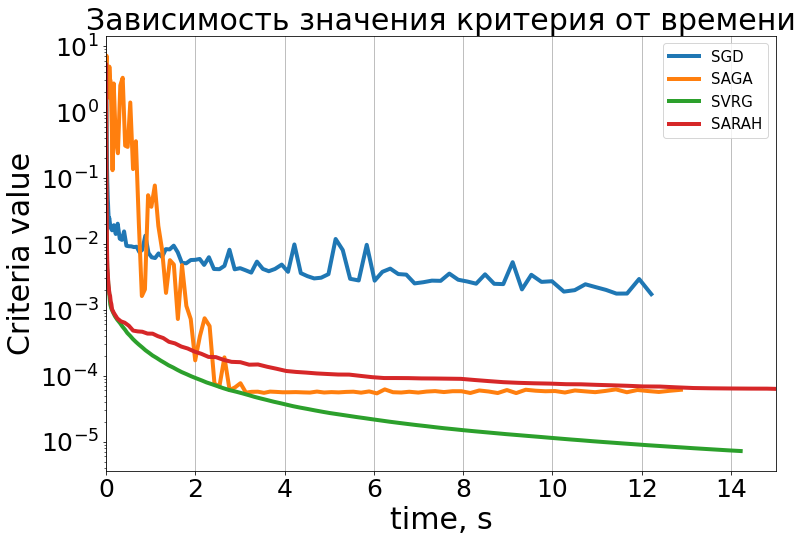

In [29]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time1[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, gradient(X_train, y_train, res1[100*i], N_train).dot(gradient(X_train, y_train, res1[100*i], N_train)))
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, time2[100*i])
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, gradient(X_train, y_train, res2[100*i], N_train).dot(gradient(X_train, y_train, res2[100*i], N_train)))    
X3 = np.array([])
for i in range (0, 99):
    X3 = np.append(X3, time3[100*i])
Y3 = np.array([])
for i in range (0, 99):
    Y3 = np.append(Y3, gradient(X_train, y_train, res3[100*i], N_train).dot(gradient(X_train, y_train, res3[100*i], N_train)))
X4 = np.array([])
for i in range (0, 99):
    X4 = np.append(X4, time4[100*i])
Y4 = np.array([])
for i in range (0, 99):
    Y4 = np.append(Y4, gradient(X_train, y_train, res4[100*i], N_train).dot(gradient(X_train, y_train, res4[100*i], N_train)))    

plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'SGD')
plt.semilogy(X2, Y2, linewidth=4, label = 'SAGA')
plt.semilogy(X3, Y3, linewidth=4, label = 'SVRG')
plt.semilogy(X4, Y4, linewidth=4, label = 'SARAH')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 15)


plt.grid(axis = 'x')

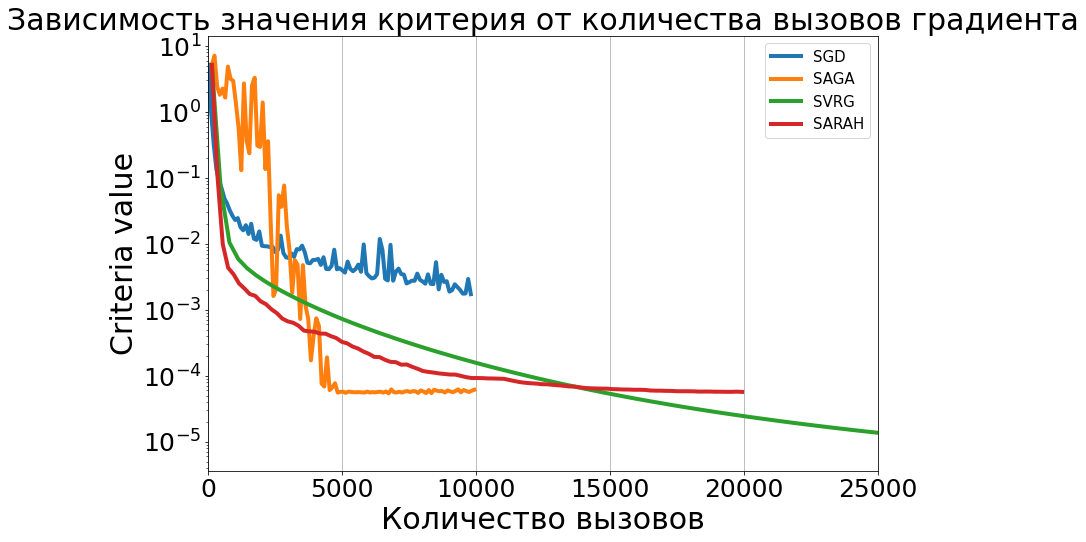

In [30]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, call1[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, gradient(X_train, y_train, res1[100*i], N_train).dot(gradient(X_train, y_train, res1[100*i], N_train)))
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, call2[100*i])
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, gradient(X_train, y_train, res2[100*i], N_train).dot(gradient(X_train, y_train, res2[100*i], N_train)))    
X3 = np.array([])
for i in range (0, 99):
    X3 = np.append(X3, call3[100*i])
Y3 = np.array([])
for i in range (0, 99):
    Y3 = np.append(Y3, gradient(X_train, y_train, res3[100*i], N_train).dot(gradient(X_train, y_train, res3[100*i], N_train)))
X4 = np.array([])
for i in range (0, 99):
    X4 = np.append(X4, call4[100*i])
Y4 = np.array([])
for i in range (0, 99):
    Y4 = np.append(Y4, gradient(X_train, y_train, res4[100*i], N_train).dot(gradient(X_train, y_train, res4[100*i], N_train)))    

plt.figure(figsize=(12, 8))

plt.semilogy(X1, Y1, linewidth=4, label = 'SGD')
plt.semilogy(X2, Y2, linewidth=4, label = 'SAGA')
plt.semilogy(X3, Y3, linewidth=4, label = 'SVRG')
plt.semilogy(X4, Y4, linewidth=4, label = 'SARAH')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Количество вызовов", fontsize=30)
plt.ylabel("Criteria value", fontsize=30)
plt.title(r"Зависимость значения критерия от количества вызовов градиента", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 25000)


plt.grid(axis = 'x')

In [31]:
def precisions(iteration, res):
    number_of_true_precisions = 0
    for i in range (N_test): 
        if (res[iteration].dot(X_test[i]) >= 0):
            k = 1
        else:
            k = -1
        if (k == y_test[i]):
            number_of_true_precisions = number_of_true_precisions + 1   
    procent_of_precisions = number_of_true_precisions/y_test.shape[0]
    return procent_of_precisions, number_of_true_precisions

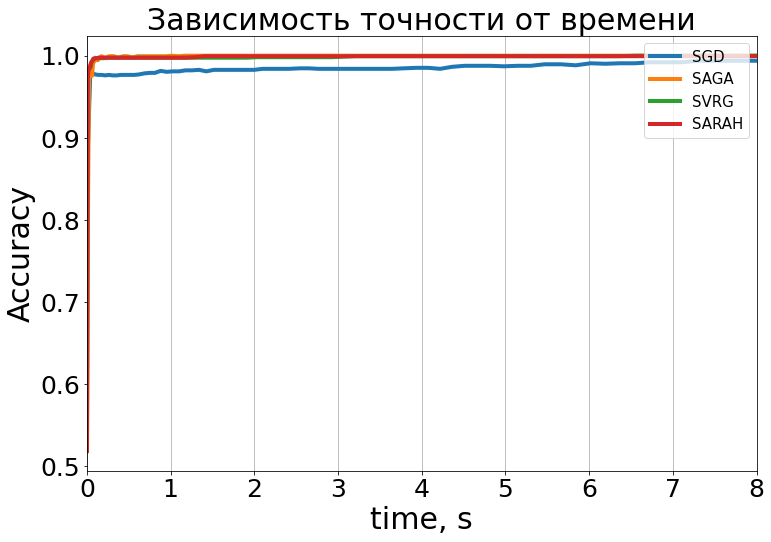

In [32]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, time1[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, precisions(100*i, res1)[0])
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, time2[100*i])
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, precisions(100*i, res2)[0])    
X3 = np.array([])
for i in range (0, 99):
    X3 = np.append(X3, time3[100*i])
Y3 = np.array([])
for i in range (0, 99):
    Y3 = np.append(Y3, precisions(100*i, res3)[0])
X4 = np.array([])
for i in range (0, 99):
    X4 = np.append(X4, time4[100*i])
Y4 = np.array([])
for i in range (0, 99):
    Y4 = np.append(Y4, precisions(100*i, res4)[0])    

plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'SGD')
plt.plot(X2, Y2, linewidth=4, label = 'SAGA')
plt.plot(X3, Y3, linewidth=4, label = 'SVRG')
plt.plot(X4, Y4, linewidth=4, label = 'SARAH')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"time, s", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от времени", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 8)


plt.grid(axis = 'x')

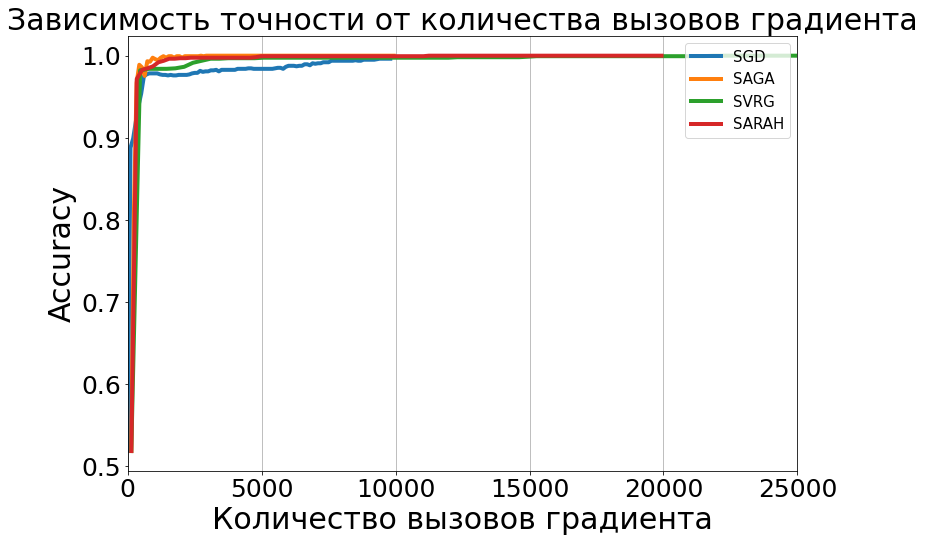

In [33]:
X1 = np.array([])
for i in range (0, 99):
    X1 = np.append(X1, call1[100*i])
Y1 = np.array([])
for i in range (0, 99):
    Y1 = np.append(Y1, precisions(100*i, res1)[0])
X2 = np.array([])
for i in range (0, 99):
    X2 = np.append(X2, call2[100*i])
Y2 = np.array([])
for i in range (0, 99):
    Y2 = np.append(Y2, precisions(100*i, res2)[0])    
X3 = np.array([])
for i in range (0, 99):
    X3 = np.append(X3, call3[100*i])
Y3 = np.array([])
for i in range (0, 99):
    Y3 = np.append(Y3, precisions(100*i, res3)[0])
X4 = np.array([])
for i in range (0, 99):
    X4 = np.append(X4, call4[100*i])
Y4 = np.array([])
for i in range (0, 99):
    Y4 = np.append(Y4, precisions(100*i, res4)[0])    

plt.figure(figsize=(12, 8))

plt.plot(X1, Y1, linewidth=4, label = 'SGD')
plt.plot(X2, Y2, linewidth=4, label = 'SAGA')
plt.plot(X3, Y3, linewidth=4, label = 'SVRG')
plt.plot(X4, Y4, linewidth=4, label = 'SARAH')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"Количество вызовов градиента", fontsize=30)
plt.ylabel("Accuracy", fontsize=30)
plt.title(r"Зависимость точности от количества вызовов градиента", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(0, 25000)


plt.grid(axis = 'x')

### Вывод
Все методы хорошо сошлись, хуже всех сошелся SGD, лучше и быстрее всех сошелся SVRG. SAGA и SARAH сошлись лучше за меньшее количество вызовов градиента. В плане точности все методы показали высокую точность, SGD и SARAH были самыми быстрыми, SVRG потребовалось много вызовов градиента, а SAGA долго колебался, но вызовов градиента ему потребовалось немного.

__Бонусные пункты__

__(г)__ Методы SGD, SAGA, SVRG, SARAH, которые мы рассматривали, предполагают случайный выбор индекса на каждой итерации. Но между тем, на практике обычно делают по-другому и просто последовательно меняют $i_k$ от $1$ до $n$ (а потом заново). В [работе](https://arxiv.org/abs/2006.05988) изучаются такие подходы. Реализуйте Random Reshuffling и Shuffle Once для SGD и SARAH. Сравните новые алгоритмы со старыми версиями SGD и SARAH из пунктов (б) и (в).

In [34]:
#ответ

__(д)__ Методы SVRG и SARAH имеют loopless версии: L-SVRG (секция А.10 из [работы](https://arxiv.org/pdf/1905.11261.pdf) и PAGE ([работа](https://proceedings.mlr.press/v139/li21a.html)), соотвественно. Реализуйте их. Как будете выбирать вероятности в этих алгоритмах? Сравните новые алгоритмы со старыми версиями SVRG и SARAH из пунктов (б) и (в).